In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import time


5.1(a) Get Data

In [16]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [17]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [18]:
X1.describe()


Attributes    Adj Close             
Symbols           GOOGL          IBM
count       1258.000000  1258.000000
mean          83.327420   115.472707
std           31.585117    10.841204
min           46.714001    79.847023
25%           57.122874   109.069324
50%           69.238003   114.154491
75%          112.697622   124.163918
max          149.838501   141.102219

In [19]:
X2.describe()


,DEXJPUS,DEXUSUK
count,1242.000000,1242.00000
mean,111.860145,1.31101
std,7.691142,0.05883
min,102.520000,1.14190
25%,107.700000,1.27265
50%,109.810000,1.31080
75%,112.775000,1.35620
max,144.390000,1.43320


In [20]:
X3.describe()


,SP500,DJIA,VIXCLS
count,1258.000000,1258.000000,1261.000000
mean,3382.457353,28585.312663,20.502831
std,688.228156,4123.343797,8.684854
min,2237.400000,18591.930000,9.140000
25%,2793.855000,25316.750000,14.650000
50%,3120.320000,27124.010000,18.760000
75%,4019.357500,32650.240000,24.470000
max,4796.560000,36799.650000,82.690000


In [21]:
X1.fillna(X1.median(),inplace = True)
X2.fillna(X2.median(),inplace = True)
X3.fillna(X3.median(),inplace = True)

C:\Users\Asus\AppData\Local\Temp/ipykernel_5984/1114603409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)
C:\Users\Asus\AppData\Local\Temp/ipykernel_5984/1114603409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)


5.1 (b) Standardized Data

In [22]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
standard_scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(standard_scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(standard_scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(standard_scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

backHistory = [30, 45, 60, 90, 180, 240] -> ทดลองหยิบ 3 ค่า 3 รูปแบบ เพื่อดูระยะเวลาการดูค่าข้อมูลย้อนหลงัหลายๆแบบและเปรียบเทียบ MSE

In [24]:
backHistory = [30, 45, 60, 90, 180, 240]
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]
Y = pd.DataFrame()
return_period = 1
Y = base.shift(-return_period)
X4_BH1 = base.diff( BH1).shift( - BH1)
X4_BH2 = base.diff( BH2).shift( - BH2)
X4_BH3 = base.diff( BH3).shift( - BH3)

X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [25]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [26]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838722,-1.159659,-0.510343,-0.017097,0.603684,-1.293916,-1.537388,-1.198135,0.238229,0.144408,-0.149237
2017-09-26,69.393135,-1.154671,-0.462355,0.051993,0.542792,-1.293651,-1.540289,-1.202817,0.154573,-0.000609,-0.133561
2017-09-27,69.411919,-1.119086,-0.524950,0.131711,0.506257,-1.278594,-1.526391,-1.237935,0.167769,0.104622,-0.185041
2017-09-28,69.994499,-1.111310,-0.524950,0.118425,0.565409,-1.274136,-1.516411,-1.275394,0.171579,0.037872,-0.165506
2017-09-29,70.107269,-1.097200,-0.565287,0.115767,0.507997,-1.260408,-1.510523,-1.280076,-0.034679,-0.162270,-0.182320
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-16,244.520004,0.616757,1.088623,4.154831,-2.941950,0.738250,0.564081,0.685335,NaN,NaN,NaN
2022-09-19,242.449997,0.625308,1.131071,NaN,NaN,0.777456,0.612699,0.622123,NaN,NaN,NaN
2022-09-20,238.949997,0.564179,0.999114,NaN,NaN,0.712565,0.535444,0.786005,NaN,NaN,NaN
2022-09-21,240.979996,0.505267,0.872694,NaN,NaN,0.615139,0.406677,0.883164,NaN,NaN,NaN


5.1 (c) Data Preparation

In [27]:
dataset = dataset[dataset.isnull().sum(axis=1)<2]
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838722,-1.159659,-0.510343,-0.017097,0.603684,-1.293916,-1.537388,-1.198135,0.238229,0.144408,-0.149237
2017-09-26,69.393135,-1.154671,-0.462355,0.051993,0.542792,-1.293651,-1.540289,-1.202817,0.154573,-0.000609,-0.133561
2017-09-27,69.411919,-1.119086,-0.524950,0.131711,0.506257,-1.278594,-1.526391,-1.237935,0.167769,0.104622,-0.185041
2017-09-28,69.994499,-1.111310,-0.524950,0.118425,0.565409,-1.274136,-1.516411,-1.275394,0.171579,0.037872,-0.165506
2017-09-29,70.107269,-1.097200,-0.565287,0.115767,0.507997,-1.260408,-1.510523,-1.280076,-0.034679,-0.162270,-0.182320
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,268.304260,0.924334,1.595893,2.471445,-1.348329,0.912302,0.914874,1.674478,-0.980299,-1.338439,NaN
2022-05-10,259.393951,0.984006,1.111997,2.450187,-1.386603,0.926783,0.893934,1.468456,-1.110518,-1.546362,NaN
2022-05-11,254.217041,0.958905,1.259626,2.448858,-1.379644,0.829550,0.813430,1.418120,-0.739754,-1.268480,NaN
2022-05-12,259.961456,0.934881,1.455553,2.169844,-1.586676,0.822021,0.787845,1.325644,-0.138891,-1.200356,NaN


In [28]:
dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].mean(),inplace = True)
dataset

C:\Users\Asus\AppData\Local\Temp/ipykernel_5984/3474217684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MSFT_12DT'].fillna(dataset['MSFT_12DT'].mean(),inplace = True)


,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838722,-1.159659,-0.510343,-0.017097,0.603684,-1.293916,-1.537388,-1.198135,0.238229,0.144408,-1.492375e-01
2017-09-26,69.393135,-1.154671,-0.462355,0.051993,0.542792,-1.293651,-1.540289,-1.202817,0.154573,-0.000609,-1.335609e-01
2017-09-27,69.411919,-1.119086,-0.524950,0.131711,0.506257,-1.278594,-1.526391,-1.237935,0.167769,0.104622,-1.850411e-01
2017-09-28,69.994499,-1.111310,-0.524950,0.118425,0.565409,-1.274136,-1.516411,-1.275394,0.171579,0.037872,-1.655057e-01
2017-09-29,70.107269,-1.097200,-0.565287,0.115767,0.507997,-1.260408,-1.510523,-1.280076,-0.034679,-0.162270,-1.823199e-01
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,268.304260,0.924334,1.595893,2.471445,-1.348329,0.912302,0.914874,1.674478,-0.980299,-1.338439,-9.227828e-17
2022-05-10,259.393951,0.984006,1.111997,2.450187,-1.386603,0.926783,0.893934,1.468456,-1.110518,-1.546362,-9.227828e-17
2022-05-11,254.217041,0.958905,1.259626,2.448858,-1.379644,0.829550,0.813430,1.418120,-0.739754,-1.268480,-9.227828e-17
2022-05-12,259.961456,0.934881,1.455553,2.169844,-1.586676,0.822021,0.787845,1.325644,-0.138891,-1.200356,-9.227828e-17


In [29]:
dataset = dataset.dropna()
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,68.838722,-1.159659,-0.510343,-0.017097,0.603684,-1.293916,-1.537388,-1.198135,0.238229,0.144408,-1.492375e-01
2017-09-26,69.393135,-1.154671,-0.462355,0.051993,0.542792,-1.293651,-1.540289,-1.202817,0.154573,-0.000609,-1.335609e-01
2017-09-27,69.411919,-1.119086,-0.524950,0.131711,0.506257,-1.278594,-1.526391,-1.237935,0.167769,0.104622,-1.850411e-01
2017-09-28,69.994499,-1.111310,-0.524950,0.118425,0.565409,-1.274136,-1.516411,-1.275394,0.171579,0.037872,-1.655057e-01
2017-09-29,70.107269,-1.097200,-0.565287,0.115767,0.507997,-1.260408,-1.510523,-1.280076,-0.034679,-0.162270,-1.823199e-01
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,268.304260,0.924334,1.595893,2.471445,-1.348329,0.912302,0.914874,1.674478,-0.980299,-1.338439,-9.227828e-17
2022-05-10,259.393951,0.984006,1.111997,2.450187,-1.386603,0.926783,0.893934,1.468456,-1.110518,-1.546362,-9.227828e-17
2022-05-11,254.217041,0.958905,1.259626,2.448858,-1.379644,0.829550,0.813430,1.418120,-0.739754,-1.268480,-9.227828e-17
2022-05-12,259.961456,0.934881,1.455553,2.169844,-1.586676,0.822021,0.787845,1.325644,-0.138891,-1.200356,-9.227828e-17


In [30]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1.168000e+03,1.168000e+03
mean,175.621511,-0.070238,-0.124786,-0.221578,0.131222,-0.055005,-0.050453,-0.040424,-0.003520,-8.516779e-17,-8.516779e-17
std,78.289617,1.003465,0.919768,0.561189,0.911845,1.020645,1.025468,1.036782,1.001872,1.000428e+00,9.611119e-01
min,68.838722,-1.159659,-3.287444,-1.228816,-2.814948,-1.676622,-2.450346,-1.323388,-3.836093,-3.763464e+00,-3.677681e+00
25%,103.576574,-0.847589,-0.638534,-0.561174,-0.435824,-0.874635,-0.829112,-0.730487,-0.415369,-3.352333e-01,-3.726815e-01
50%,153.691597,-0.563636,-0.193406,-0.282824,0.051310,-0.520999,-0.430994,-0.289762,0.056998,1.989200e-02,-9.227828e-17
75%,238.694096,0.665925,0.487397,0.012798,0.841161,0.829162,0.958039,0.328307,0.480988,5.074751e-01,5.529573e-01
max,340.882812,2.106610,1.936157,2.547177,2.125975,2.101072,2.037278,7.286259,2.577556,2.210593e+00,2.421414e+00


In [31]:
new_data = dataset.corr()
new_data

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
"(Adj Close, MSFT)",1.000000,0.960686,0.432042,0.232269,0.273989,0.966993,0.920964,0.273930,-0.164466,-0.231512,-0.207007
"(Adj Close, GOOGL)",0.960686,1.000000,0.570911,0.348315,0.424781,0.985402,0.959553,0.120702,-0.187263,-0.294004,-0.333598
"(Adj Close, IBM)",0.432042,0.570911,1.000000,0.411740,0.513822,0.586726,0.651563,-0.402174,-0.171379,-0.244611,-0.346191
DEXJPUS,0.232269,0.348315,0.411740,1.000000,-0.028687,0.296736,0.305399,-0.106854,-0.479969,-0.529632,-0.351729
DEXUSUK,0.273989,0.424781,0.513822,-0.028687,1.000000,0.429961,0.473309,-0.300978,0.062570,0.003714,-0.191443
SP500,0.966993,0.985402,0.586726,0.296736,0.429961,1.000000,0.985656,0.077846,-0.201788,-0.267127,-0.256548
DJIA,0.920964,0.959553,0.651563,0.305399,0.473309,0.985656,1.000000,-0.039363,-0.201504,-0.249745,-0.250732
VIXCLS,0.273930,0.120702,-0.402174,-0.106854,-0.300978,0.077846,-0.039363,1.000000,0.169620,0.187889,0.250129
MSFT_3DT,-0.164466,-0.187263,-0.171379,-0.479969,0.062570,-0.201788,-0.201504,0.169620,1.000000,0.694603,0.341283
MSFT_6DT,-0.231512,-0.294004,-0.244611,-0.529632,0.003714,-0.267127,-0.249745,0.187889,0.694603,1.000000,0.572228


<AxesSubplot:>

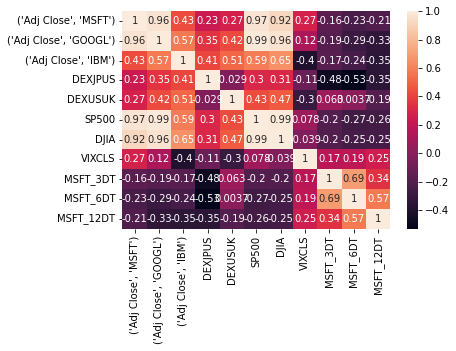

In [32]:
sns.heatmap(new_data,annot=True)

In [33]:
lower = pd.DataFrame(np.tril(new_data, -1),columns = new_data.columns)
lower

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.960686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.432042,0.570911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.232269,0.348315,0.411740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.273989,0.424781,0.513822,-0.028687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.966993,0.985402,0.586726,0.296736,0.429961,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.920964,0.959553,0.651563,0.305399,0.473309,0.985656,0.000000,0.000000,0.000000,0.000000,0.0
7,0.273930,0.120702,-0.402174,-0.106854,-0.300978,0.077846,-0.039363,0.000000,0.000000,0.000000,0.0
8,-0.164466,-0.187263,-0.171379,-0.479969,0.062570,-0.201788,-0.201504,0.169620,0.000000,0.000000,0.0
9,-0.231512,-0.294004,-0.244611,-0.529632,0.003714,-0.267127,-0.249745,0.187889,0.694603,0.000000,0.0


In [34]:
to_drop = [column for column in lower if any(lower[column] > 0.75)]
dataset.drop(to_drop, inplace=True, axis=1)
dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-09-25,-0.510343,-0.017097,0.603684,-1.537388,-1.198135,0.238229,0.144408,-1.492375e-01
2017-09-26,-0.462355,0.051993,0.542792,-1.540289,-1.202817,0.154573,-0.000609,-1.335609e-01
2017-09-27,-0.524950,0.131711,0.506257,-1.526391,-1.237935,0.167769,0.104622,-1.850411e-01
2017-09-28,-0.524950,0.118425,0.565409,-1.516411,-1.275394,0.171579,0.037872,-1.655057e-01
2017-09-29,-0.565287,0.115767,0.507997,-1.510523,-1.280076,-0.034679,-0.162270,-1.823199e-01
...,...,...,...,...,...,...,...,...
2022-05-09,1.595893,2.471445,-1.348329,0.914874,1.674478,-0.980299,-1.338439,-9.227828e-17
2022-05-10,1.111997,2.450187,-1.386603,0.893934,1.468456,-1.110518,-1.546362,-9.227828e-17
2022-05-11,1.259626,2.448858,-1.379644,0.813430,1.418120,-0.739754,-1.268480,-9.227828e-17
2022-05-12,1.455553,2.169844,-1.586676,0.787845,1.325644,-0.138891,-1.200356,-9.227828e-17
